In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

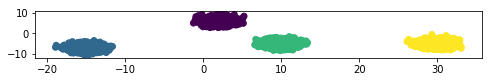

Number of estimated clusters: 4


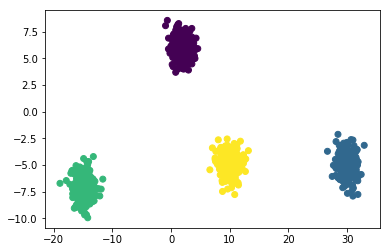

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273    0    0    0
1        0    0  239    0
2        0    0    0  238
3        0  250    0    0


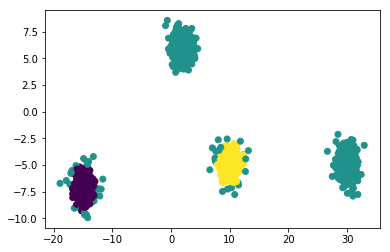

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0  273    0
1      211   28    0
2        0   23  215
3        0  250    0
Done
Estimated number of clusters: 726


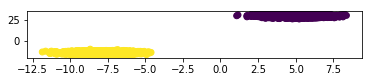

Number of estimated clusters: 2


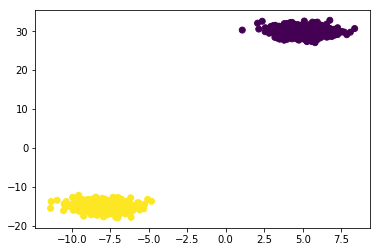

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0      512    0
1        0  488


/Users/majic/.local/share/virtualenvs/thinkful-py3-eTaMB5Ia/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/Users/majic/.local/share/virtualenvs/thinkful-py3-eTaMB5Ia/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


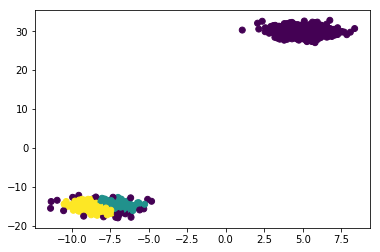

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      512    0    0
1       28  209  251
Done
Estimated number of clusters: 259


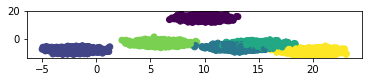

Number of estimated clusters: 3


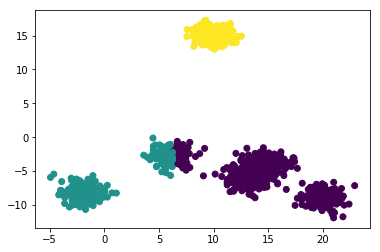

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        0    0  176
1        0  186    0
2      151    0    0
3      169    0    0
4       70   95    0
5      153    0    0


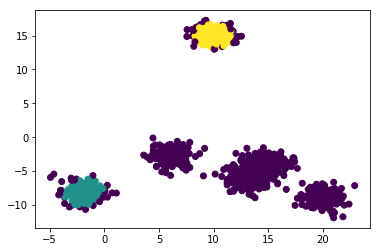

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       27    0  149
1       27  159    0
2      151    0    0
3      169    0    0
4      165    0    0
5      153    0    0
Done
Estimated number of clusters: 42


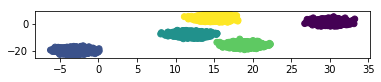

Number of estimated clusters: 5


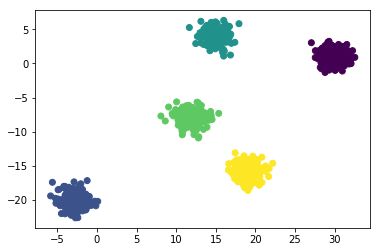

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0      221    0    0    0    0
1        0  203    0    0    0
2        0    0    0  191    0
3        0    0    0    0  187
4        0    0  198    0    0


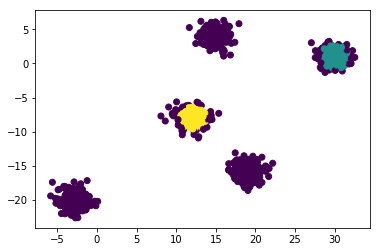

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0       35  186    0
1      203    0    0
2       44    0  147
3      187    0    0
4      198    0    0
Done
Estimated number of clusters: 330


In [41]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import AffinityPropagation
from sklearn import metrics


# The coordinates of the centers of our blobs.
centers = [
    [[2, 6], [-15, -7], [10, -5], [30, -5]],
    [[5, 30], [-8, -15]],
    [[10, 15], [-2, -8], [13, -6], [15, -4], [6, -3], [20, -9]],
    [[30, 1], [-3, -20], [12, -8], [19, -16], [15, 4]]
]

# Make 10,000 rows worth of data with two features and varying
# clusters, each having a standard deviation of 1.
plt.figure(figsize=(8,4))
for i, center in  enumerate(centers):
    n_clust = len(center)
    X, y = make_blobs(
        n_samples=10000,
        centers=center,
        cluster_std=1,
        n_features=2,
        random_state=42)
    
    # ****** K-MEANS ********
    
    plt.subplot(4, 1, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=y)   
    plt.show()
    #Divide into training and test sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)
    
    
    # ****** MEAN SHIFT ********
    
    # Here we set the bandwidth. This function automatically derives a bandwidth
    # number based on an inspection of the distances among points in the data.
    bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

    # Declare and fit the model.
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point.
    labels = ms.labels_

    # Coordinates of the cluster centers.
    cluster_centers = ms.cluster_centers_

    # Count our clusters.
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,labels))
    
    
    # ****** SPECTRAL CLUSTERING ********
    
    # We know we're looking for three clusters.
    n_clusters=3

    # Declare and fit the model.
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    #Predicted clusters.
    predict=sc.fit_predict(X_train)

    #Graph results.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train,predict))


    # Declare the model and fit it in one statement.
    # Note that you can provide arguments to the model, but we didn't.
    af = AffinityPropagation().fit(X_train)
    print('Done')

    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))

In [3]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 3


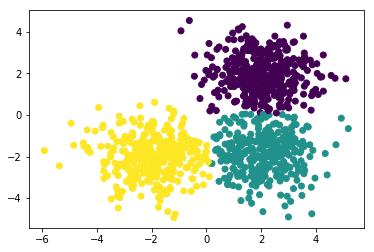

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

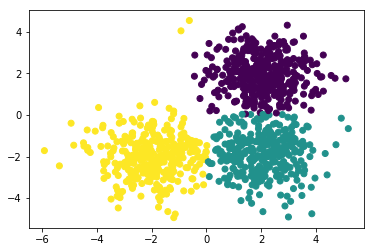

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      350   10    2
1        1    9  310
2        7  305    6


In [5]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 93


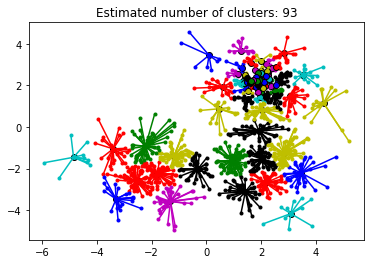

In [7]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()